## Tipos de Cocina a través de sus ingredientes

##### *Descripción:* El objectivo principal del proyecto es clasificar los diferentes tipos de cocinas basados en sus ingredientes. Además nos conectamos a la API de Usda Fodds para obetener información nutricional asi como posibles recetas en base a dichos ingredientes


El esquema que seguiremos será el siguiente: 

ANÁLISIS EXPLORATORIO DE DATOS (EDA)  
1.1. Acondicionamiento bases de datos  
1.2. Análisis visual  
1.3. Análisis estadístico  

MACHINE LEARNING  
2.1. Preparación y limpieza de datos  
2.2. Feature Engineering  
2.3. Modelado  

RESULTADOS  
3.1. Visualización y reporting de los resultados  
3.2. Creación de un pipeline para el flujo automatizado  


los datosse encuentran en (https://www.kaggle.com/c/whats-cooking/data), en formato json y se convierten a dataframe.

Machine Learning:
para nuestra  Feature Selection:
  * Utilizamos Regex 
  * Usamos Porter Stemmer Algorithm
  * Penn Treebank POS tagging
  * Usamos un Label Encoder of sklearn para la columna cuisine.
  * Se convierte la columna ingredientes en una Matriz TFIDF,  (Term frequency – Inverse document frequency)
  * Usamos la libreria scikit-learn para el training (X-TFIDF Matrix, Y-Label Encoder de los valores de cuisine).
  * Usamos diferentes algoritmos para el baseline de  Machine Learning Algorithm y NLP para obtener la mejor predicción.
  * Se guardan los modelos y las predicciones.
  * Ajuste de parámetros.


Importamos las librerias necesarias

In [ ]:
from util.libreries import *
from util.model import *

In [1]:
import xgboost as xgb

#model = xgb.XGBClassifier(missing='NaN')

In [2]:
import nltk
#nltk.download('all')
#nltk.download('punkt')

In [3]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

file = r"C:\Users\mareg\Downloads\archive (8)\train.json"
with open(file) as train_file:
    dict_train = json.load(train_file)
    
print(dict_train[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [6]:
print(dict_train[2]['ingredients'])

['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']


In [8]:
len(dict_train)

39774

In [9]:
id_ = []
cuisine = []
ingredients = []
for i in range(len(dict_train)):
    id_.append(dict_train[i]['id'])
    cuisine.append(dict_train[i]['cuisine'])
    ingredients.append(dict_train[i]['ingredients'])

In [10]:
import pandas as pd
df = pd.DataFrame({'id':id_, 
                   'cuisine':cuisine, 
                   'ingredients':ingredients})
df.head()

id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

In [11]:
df.dtypes

id              int64
cuisine        object
ingredients    object
dtype: object

In [13]:
df.shape

(39774, 3)

In [14]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [15]:
df.cuisine.nunique()
print(df.cuisine.nunique())
df.cuisine.unique()

20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

EDA

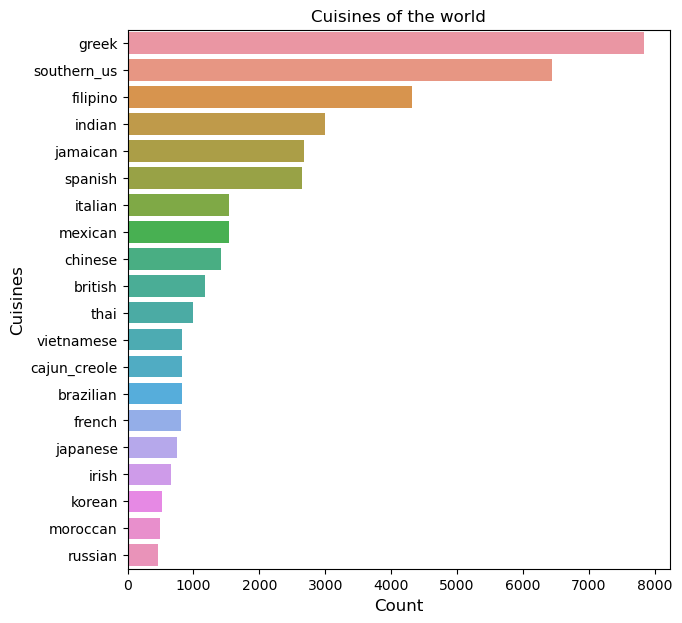

In [16]:

unique_cuisines = ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian',
                   'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian',
                   'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']

# Contar la cantidad de cocinas únicas en el dataframe "df"
count_cuisine = df['cuisine'].value_counts()

plt.figure(figsize=(7, 7))
sns.barplot(x=count_cuisine.values, y=unique_cuisines)
plt.title('Cuisines of the world')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisines', fontsize=12)
plt.show()

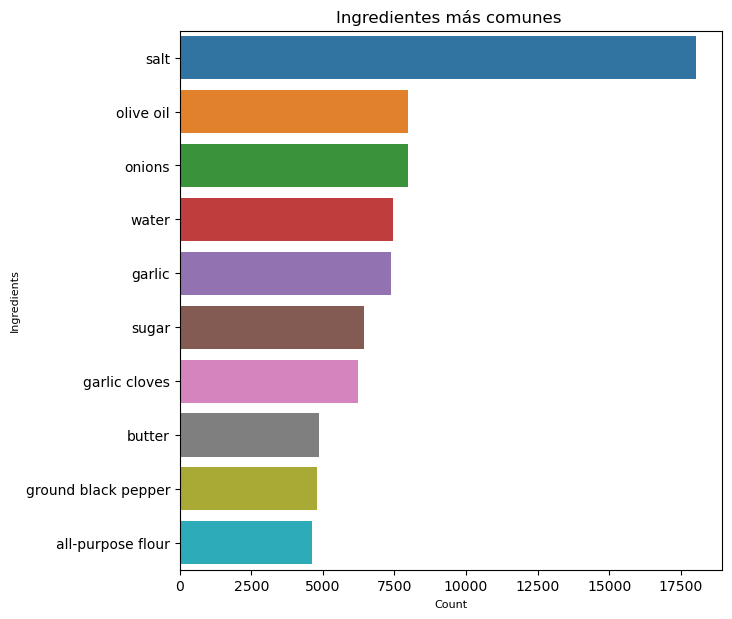

In [14]:
#Finding count of most common ingredients in train dataframe
count_ingredients = []
for x in df['ingredients']:
    for y in x:
        count_ingredients.append(y)
count_ingredients = pd.Series(count_ingredients)
c_ingredients = count_ingredients.value_counts(sort=True).head(10)
plt.figure(figsize=(7,7))
sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
plt.title('Ingredientes más comunes ')
plt.ylabel('Ingredients', fontsize=8)
plt.xlabel('Count', fontsize=8)
plt.show()

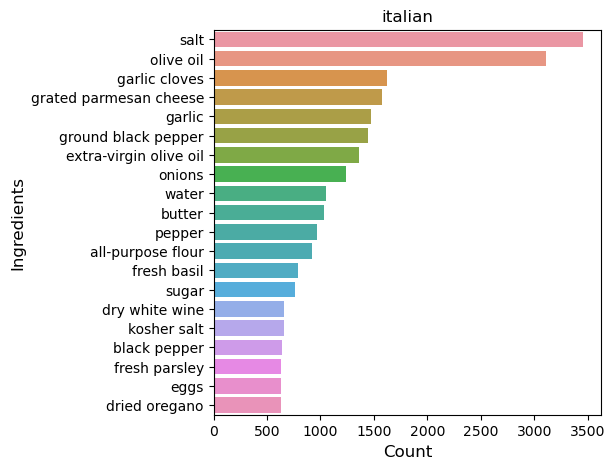

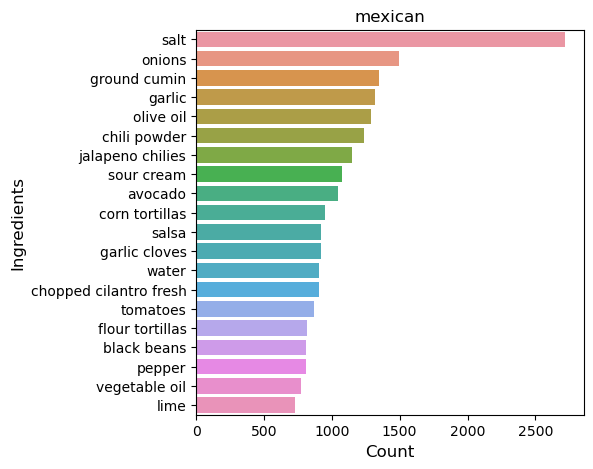

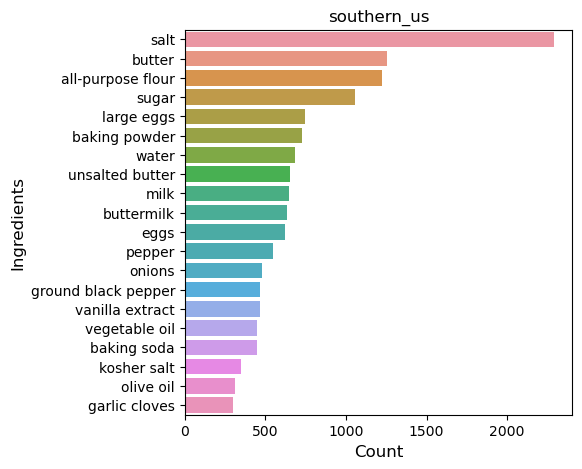

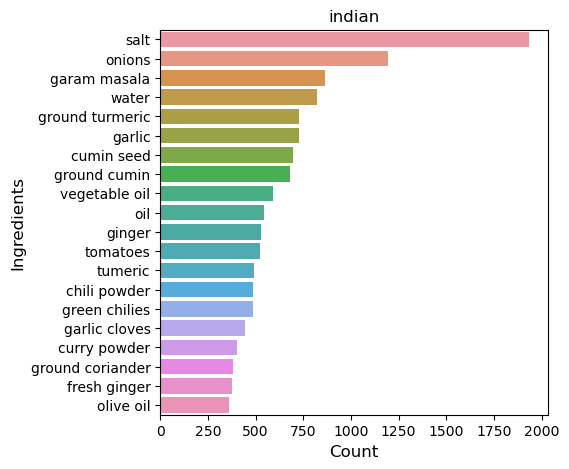

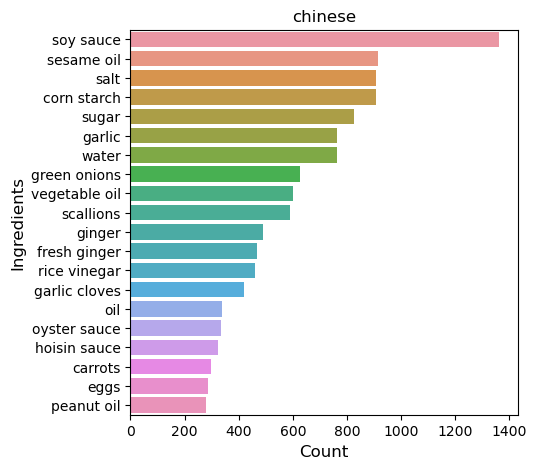

In [17]:
# Obtener las 5 principales cocinas del dataframe de entrenamiento
top_cuisines = df['cuisine'].value_counts().head(5).index

for i in top_cuisines:
    ingredients = []
    for j in df[df['cuisine'] == i]['ingredients']:
        for k in j:
            ingredients.append(k)
    ingredients = pd.Series(ingredients)
    c_ingredients = ingredients.value_counts(sort=True).head(20)
    plt.figure(figsize=(5,5))
    sns.barplot(y=c_ingredients.index, x=c_ingredients.values)
    plt.title(i)
    plt.ylabel('Ingredients', fontsize=12)
    plt.xlabel('Count', fontsize=12)
    plt.show()

Transformación de los Datos 

Transformamos las listas de ingredientes en la columna []'ingredients'] del DataFrame en cadenas de texto, para luego poder operar, los ingredientes están separados por espacios. 

In [18]:
new = []
for s in df['ingredients']:
    s = ' '.join(s)
    new.append(s)
    

Creamos una nueva columna [ing]

In [19]:
df['ing'] = new

Limpieza de las palabras

Usamos la libreria Natural Language Toolkit (nltk) y re de nltk, quitamos las stopwords de nlp, y con el Penn Treebank POS tagging system , que es  Part-of-Speech (POS) tagging,los adjetivos  JJ and JJR , que son etiquetas que se usan para identificar los  adjectivos el el texto.
JJ: representa el adjetivo en su  forma de base  (e.j., "big", "green").
JJR: representa el adjetivo comparativo (e.j., "bigger", "greener").
También usamos el algoritmo de Porter Stemmer para reducir las palabras a su forma base o raíz (stem) eliminando sufijos y prefijos.

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
l = []

for s in df['ing']:
    # Quitar punctuación
    s = re.sub(r'[^\w\s]', '', s)
    
    # Quitar numeros
    s = re.sub(r'(\d)', '', s)
    
    # quitar paréntesis
    s = re.sub(r'\([^)]*\)', '', s)
    
    # Quitamos la marca registrada (™) en la codificación Unicode.
    s = re.sub(u'\w*\u2122', '', s)
    
    # Convert to lowercase
    s = s.lower()
    
    # Quitamos stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    s = ' '.join(filtered_sentence)
    
    # quitamos adjectivos
    tagged_words = nltk.pos_tag(word_tokenize(s))
    filtered_words = [w for w, pos in tagged_words if pos not in ['JJ', 'JJR', 'JJS']]
    s = ' '.join(filtered_words)
    
     #Aplicamos algoritmo Porter Stemmer 
    words = word_tokenize(s)
    word_ps = [ps.stem(w) for w in words]
    s = ' '.join(word_ps)
    
    l.append(s)

df['ing_mod'] = l
print(df.head(10))

      id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   
5   6602     jamaican  [plain flour, sugar, butter, eggs, fresh ginge...   
6  42779      spanish  [olive oil, salt, medium shrimp, pepper, garli...   
7   3735      italian  [sugar, pistachio nuts, white almond bark, flo...   
8  16903      mexican  [olive oil, purple onion, fresh pineapple, por...   
9  12734      italian  [chopped tomatoes, fresh basil, garlic, extra-...   

                                                 ing  \
0  romaine lettuce black olives grape tomatoes ga...   
1  plain flour ground pepper salt tomatoes ground..

In [21]:
df.head()

id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   

                                                 ing  \
0  romaine lettuce black olives grape tomatoes ga...   
1  plain flour ground pepper salt tomatoes ground...   
2  eggs pepper salt mayonaise cooking oil green c...   
3                     water vegetable oil wheat salt   
4  black pepper shallots cornflour cayenne pepper...   

                                             ing_mod  
0  romain lettuc oliv grape tomato purpl onion se...  
1  plain ground pepper salt tomato ground pepper ...  
2  egg pepper salt mayonais cook oil chili grill ...  
3                               water oil wheat salt  
4  pepper shallot cornflour pepper onion past mil...

In [22]:
df.to_csv('cuisin_mod.csv', index=False)

In [23]:
df1 = pd.read_csv('cuisin_mod.csv')


In [24]:
df.drop(['ing', 'ingredients'], axis=1, inplace=True)

In [25]:
df = df.rename(columns={'ing_mod': 'ingredients'})

In [26]:
df.head()

id      cuisine                                        ingredients
0  10259        greek  romain lettuc oliv grape tomato purpl onion se...
1  25693  southern_us  plain ground pepper salt tomato ground pepper ...
2  20130     filipino  egg pepper salt mayonais cook oil chili grill ...
3  22213       indian                               water oil wheat salt
4  13162       indian  pepper shallot cornflour pepper onion past mil...

Vectorizamos la columna que utilizaremos para la  predicción [ing_mod] 
X, que contiene la matriz de características TF-IDF.
Muestra los valores de TF-IDF calculados para cada término (palabra) en cada documento. Los números entre paréntesis representan la posición del documento (fila) y la posición del término (columna) en la matriz, seguido del valor TF-IDF para ese par documento-término.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ingredients'])

print(X)
#print(vectorizer.get_feature_names())

  (0, 607)	0.35689375169060467
  (0, 787)	0.3445023274237981
  (0, 135)	0.22515714627752872
  (0, 1978)	0.2500404943418975
  (0, 1557)	0.11952014701860951
  (0, 1797)	0.3689512292479505
  (0, 2275)	0.15900421555401772
  (0, 960)	0.3802952821935505
  (0, 1554)	0.2902742630117716
  (0, 1261)	0.29790922072869397
  (0, 1892)	0.38393103310550597
  (1, 1547)	0.1308400829851538
  (1, 1426)	0.23799816255882542
  (1, 1385)	0.45224076182301604
  (1, 555)	0.24683908075584735
  (1, 729)	0.20855811386315165
  (1, 2259)	0.33316642025955323
  (1, 1937)	0.12487924899038365
  (1, 1661)	0.27511271609364674
  (1, 985)	0.339582347585046
  (1, 1722)	0.38723430632153066
  (1, 2275)	0.38696478682843105
  (2, 1283)	0.4479815019817542
  (2, 438)	0.1652864409353453
  (2, 291)	0.16795043354340453
  :	:
  (39772, 2049)	0.14100067944816105
  (39772, 214)	0.1365636658038073
  (39772, 438)	0.18269608141106386
  (39772, 1957)	0.08529376489406579
  (39772, 2090)	0.11690366768250193
  (39772, 1547)	0.05906911072105232


In [28]:
df.head()

id      cuisine                                        ingredients
0  10259        greek  romain lettuc oliv grape tomato purpl onion se...
1  25693  southern_us  plain ground pepper salt tomato ground pepper ...
2  20130     filipino  egg pepper salt mayonais cook oil chili grill ...
3  22213       indian                               water oil wheat salt
4  13162       indian  pepper shallot cornflour pepper onion past mil...

In [29]:
df.to_csv('cuisin_tokenizado1col.csv', index=False)

In [30]:
len(new)

39774

Vamos a hacer un labelencoder para nuestro target : diferentes tipos de cocinas

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['cuisine'])
df['cuisine']=le.transform(df['cuisine']) 

In [32]:
df['cuisine'].value_counts()

9     7838
13    6438
16    4320
7     3003
3     2673
5     2646
2     1546
18    1539
11    1423
6     1175
17     989
12     830
19     825
14     821
1      804
4      755
8      667
10     526
15     489
0      467
Name: cuisine, dtype: int64

In [33]:
cuisine_tags={'0':'brazilian', '1':'british', '2':'cajun_creole', '3':'chinese', '4':'filipino', '5':'french', '6':'greek', '7':'indian', '8':'irish', '9':'italian', '10':'jamaican', '11':'japanese', '12':'korean', '13':'mexican', '14':'moroccan', '15':'russian', '16':'southern_us', '17':'spanish', '18':'thai', '19':'vietnamese'}

In [34]:
# Cuisine es el target lo que se predice 

y = df['cuisine']


## **Entrenando el Modelo**

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the imputer object
imputer = SimpleImputer(strategy='mean')

División de la data:

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (39774, 2465)
Train features shape: (31819, 2465)
Train target shape: (31819,)
Test features shape: (7955, 2465)
Test target shape: (7955,)


2.2. Feature Engineering

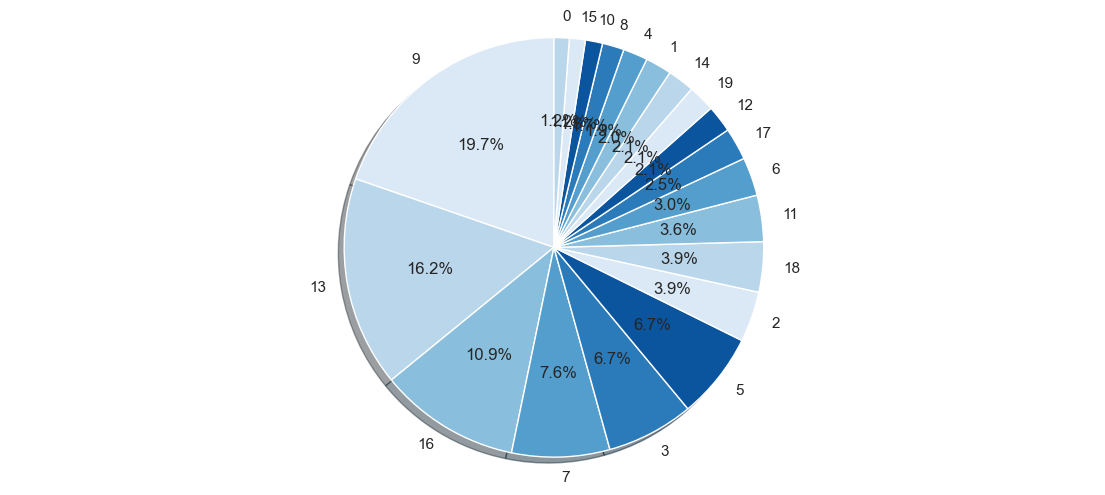

In [33]:
 #Crear una copia del DataFrame
df_encoded = df.copy()

# Aplicar la transformación del LabelEncoder en la copia del DataFrame
le = preprocessing.LabelEncoder()
df_encoded['cuisine_encoded'] = le.fit_transform(df['cuisine'])

# Crear el diccionario inverso de mapeo para obtener los nombres de las categorías
cuisine_map = {label: cuisine for label, cuisine in zip(le.transform(le.classes_), le.classes_)}

# Crear el gráfico de pastel con los nombres de las categorías
sns.set(rc={'figure.figsize':(14, 6)})
colors = sns.color_palette("Blues")

labels = [cuisine_map[label] for label in df_encoded['cuisine_encoded'].value_counts().index]
sizes = df_encoded['cuisine_encoded'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

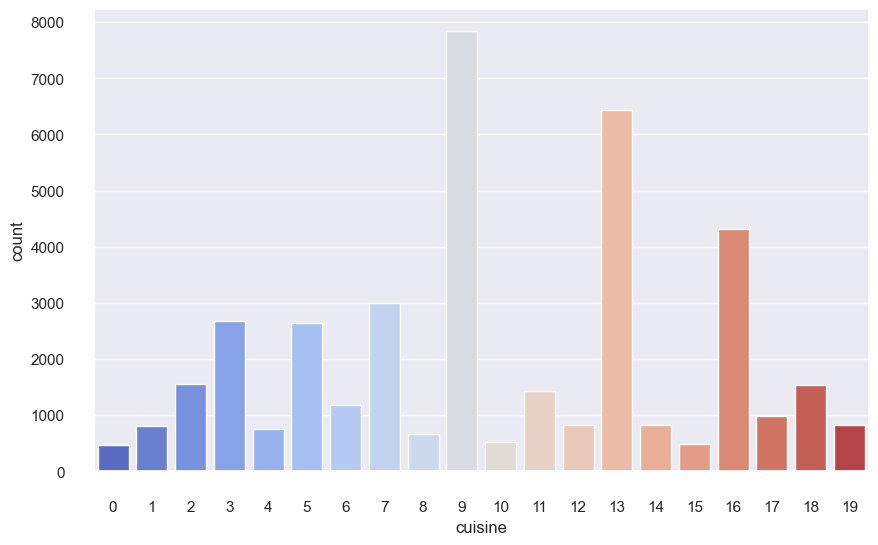

In [43]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.countplot(x='cuisine', data=df, palette='coolwarm')
plt.tick_params(pad=15)
plt.show()

Observaciones:

Dataset desbalanceado
Propuestas: 
No se considera realizar ningún cambio dado que pueden existir más recetas de un determinado tipo de cocina sin que esto sea un error. 

### **2.MODELADO**

### **Baseline:**
Con este apartado se pretende hacer una prueba de contacto con los modelos *sin tratar los datos apenas, sin buscar los hiperparámetros que mejor ajusten* y *sin balancear el dataset*. Simplemente para tener una noción del punto de partida y las diferencias sustanciales de cada modelo, aunque esto pueda cambiar con las modificaciones que se desarrollan posteriormente.

primer intento

Baseline 

In [43]:
#def baseline(X_train, y_train, X_val, y_val, base_model, file_name):
    # Ajustar el modelo base al conjunto de entrenamiento
    base_model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de validación
    y_pred = base_model.predict(X_val)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    
    # Guardar las métricas en un archivo CSV
    metrics = pd.DataFrame({
        'Model': [str(base_model)],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall]
    })
    metrics.to_csv(file_name, index=False, sep=';')
    
    return y_pred, accuracy

# Definir los modelos y sus nombres
models = {
    'LogReg': LogisticRegression(),
    'KNNC': KNeighborsClassifier(),
    'DTC': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(),
    'BagC': BaggingClassifier(),
    'AdaBC': AdaBoostClassifier(),
    'GBC': GradientBoostingClassifier(),
    'SVC': SVC(),
    'XGBC': XGBClassifier(base_score=None, booster=None, callbacks=None,
                          colsample_bylevel=None, colsample_bynode=None,
                          colsample_bytree=None, early_stopping_rounds=None,
                          enable_categorical=False, eval_metric=None, feature_types=None,
                          gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                          interaction_constraints=None, learning_rate=None, max_bin=None,
                          max_cat_threshold=None, max_cat_to_onehot=None,
                          max_delta_step=None, max_depth=None, max_leaves=None,
                          min_child_weight=None, missing=None, monotone_constraints=None,
                          n_estimators=100, n_jobs=None, num_parallel_tree=None,
                          predictor=None, random_state=None),
    'VC': VotingClassifier(estimators=[('RFC', RandomForestClassifier())]),
    'LDA': LinearDiscriminantAnalysis()
}


In [ ]:
# Vectorizar las características de texto
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(df['ingredients'])

# Codificar las etiquetas de clase
#le = preprocessing.LabelEncoder()
#Y = le.fit_transform(df['cuisine'])

### **Segundo intento parcial** Baseline1 y Baseline2

In [35]:
def baseline1(X_train, y_train, X_val, y_val, base_model, file_name):

    # Ajustar el modelo base al conjunto de entrenamiento
    base_model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de validación
    y_pred = base_model.predict(X_val)
    """
    Calculates the accuracy and other metrics for a model and saves them to a file.

    Args:
        X_train: The training data.
        y_train: The training labels.
        X_val: The validation data.
        y_val: The validation labels.
        base_model: The model to evaluate.
        file_name: The file to save the metrics to.

    Returns:
        The predictions for the validation data.
    """

    y_pred = base_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')

    # Save the metrics to the file.
    with open(file_name, 'a', newline='') as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([str(base_model), accuracy, precision, recall])

    return y_pred, accuracy

# Definir los modelos y sus nombres
models = {
    'LogReg': LogisticRegression(),
    'KNNC': KNeighborsClassifier(),
    'DTC': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(),
    'BagC': BaggingClassifier(),
    'AdaBC': AdaBoostClassifier(),
    'GBC': GradientBoostingClassifier(),
    'SVC': SVC(),
}

# Llamar a la función baseline para cada modelo
#for model_name, model in models.items():
    #y_pred, accuracy = baseline1(X_train, y_train, X_val, y_val, model, file_name='baseline_metrics.csv')


Primeros resultados pero no guardados

In [46]:
# Directorio y nombre del archivo de métricas
dir_file = os.path.join(os.getcwd(), 'model', 'model_metrics')
os.makedirs(dir_file, exist_ok=True)
file_name = os.path.join(dir_file, 'baseline_metrics.csv')

# Llamar a la función baseline para cada modelo
for model_name, model in models.items():
    y_pred, accuracy = baseline1(X_train, y_train, X_test, y_test, model, file_name= 'df_baseline_metrics.csv')
    print(f'{model_name}:')
    print('Predicciones:', y_pred)
    print('Exactitud (Accuracy):', accuracy)
    print('-' * 30)

# Leer el archivo de métricas y mostrar la comparación
df_baseline_metrics = pd.read_csv(file_name, sep=';')
df_baseline_metrics.sort_values(by='Recall', ascending=False, inplace=True)
print(df_baseline_metrics)

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg:
Predicciones: [ 3 17  6 ...  3  7 16]
Exactitud (Accuracy): 0.7585166561910748
------------------------------
KNNC:
Predicciones: [ 3 13  6 ...  3  7 15]
Exactitud (Accuracy): 0.7078566939032055
------------------------------
DTC:
Predicciones: [ 3 17  9 ...  3  7  9]
Exactitud (Accuracy): 0.5846637335009428
------------------------------
RFC:
Predicciones: [ 3  9  6 ...  3  7 16]
Exactitud (Accuracy): 0.7336266499057197
------------------------------
BagC:
Predicciones: [ 3 17  9 ...  3  7  5]
Exactitud (Accuracy): 0.6600879949717159
------------------------------


c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBC:
Predicciones: [ 3  9  9 ...  3  7 16]
Exactitud (Accuracy): 0.5181646763042111
------------------------------
GBC:
Predicciones: [ 3 17  6 ...  3  7 16]
Exactitud (Accuracy): 0.7116279069767442
------------------------------
SVC:
Predicciones: [ 3 17  6 ...  3  7  1]
Exactitud (Accuracy): 0.77561282212445
------------------------------
   Model  Accuracy  Precision    Recall
0  SVC()  0.775613   0.777513  0.775613


In [34]:
import os

file_name = 'baseline_metrics2.csv'

if not os.path.exists(file_name):
    with open(file_name, 'w', newline='') as f:
        pass

Funcion Baseline parte2

In [33]:
def baseline2(X_train, y_train, X_val, y_val, base_model, file_name):
    # Ajustar el modelo base al conjunto de entrenamiento
    base_model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de validación
    y_pred = base_model.predict(X_val)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    
    # Guardar las métricas en un archivo CSV
    metrics = pd.DataFrame({
        'Model': [str(base_model)],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall]
    })
    metrics.to_csv(file_name, index=False, sep=';')
    
    return y_pred, accuracy

# Definir los modelos y sus nombres
models = {
    'XGBC': xgb.XGBClassifier(base_score=None, booster=None, callbacks=None,
                          colsample_bylevel=None, colsample_bynode=None,
                          colsample_bytree=None, early_stopping_rounds=None,
                          enable_categorical=False, eval_metric=None, feature_types=None,
                          gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                          interaction_constraints=None, learning_rate=None, max_bin=None,
                          max_cat_threshold=None, max_cat_to_onehot=None,
                          max_delta_step=None, max_depth=None, max_leaves=None,
                          min_child_weight=None, missing=np.nan, monotone_constraints=None,
                          n_estimators=100, n_jobs=None, num_parallel_tree=None,
                          predictor=None, random_state=None),
    'VC': VotingClassifier(estimators=[('RFC', RandomForestClassifier())]),
    'LDA': LinearDiscriminantAnalysis()
}

In [34]:
# Directorio y nombre del archivo de métricas
dir_file = os.path.join(os.getcwd(), 'model', 'model_metrics')
os.makedirs(dir_file, exist_ok=True)
file_name = os.path.join(dir_file, 'baseline_metrics2.csv')

# Lista para almacenar los resultados de las métricas
metrics_results = []

# Llamar a la función baseline2 para cada modelo
for model_name, model in models.items():
    y_pred, accuracy = baseline2(X_train.toarray(), y_train, X_test.toarray(), y_test, model, file_name)
    
    # Guardar las métricas en una lista
    metrics_results.append({
        'Modelo': model_name,
        'Predicciones': y_pred,
        'Exactitud': accuracy
    })

# Convertir la lista de resultados en un DataFrame
df_baseline_metrics2 = pd.DataFrame(metrics_results)

# Guardar el DataFrame en el archivo CSV
df_baseline_metrics2.to_csv(file_name, index=False, sep=';')

# Mostrar la comparación de métricas
df_baseline_metrics2.sort_values(by='Exactitud', ascending=False, inplace=True)
print(df_baseline_metrics2)

  Modelo                                       Predicciones  Exactitud
0   XGBC  [3, 17, 6, 7, 9, 13, 9, 2, 6, 13, 17, 5, 13, 3...   0.750723
1     VC  [3, 9, 9, 7, 9, 13, 9, 2, 6, 13, 13, 7, 13, 3,...   0.730107
2    LDA  [3, 17, 14, 7, 9, 13, 9, 2, 6, 13, 10, 16, 9, ...   0.723696


Cargamos el archivo CSV que contiene métricas de un modelo y las ordenamos en función del valor de Recall de manera descendente para poder examinar las filas con el mayor Recall.

In [ ]:

# Concatenar los DataFrames verticalmente
df_baseline_total = pd.concat([df_baseline_metrics2, df_baseline_metrics, df_baseline_metrics1])
df_baseline_total = df_baseline_total.reset_index(drop=True)

In [ ]:
# Comparación de las métricas
df_baseline_total=pd.read_csv(os.getcwd()+'test\Proyecto_Final\Cuisine_classification\df_baseline_metrics1.csv',sep=';')
df_baseline_total.sort_values(by='Recall',ascending = False)

In [ ]:
def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))

In [ ]:
Loading libraries for ANN sequential model
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Building a model
ann = Sequential()
ann.add(Dense(32, activation='relu'))
ann.add(Dense(30, activation='relu'))
ann.add(Dense(23, activation='softmax'))

In [ ]:
#Compiling the model
import tensorflow as tf
import keras
ann.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Mas cosas 

In [ ]:
#Implement Grid Serch for best Gamma, C and Selection between rbf and linear kernel
from sklearn import svm, datasets
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X_train, y_train)   
print('Best score for data1:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

In [ ]:
pipeline = Pipeline([
#    ('tfidf', TfidfVectorizer()),
#    ('clf', RandomForestClassifier())
#])
#parameters = {
#    'tfidf__use_idf': (True, False),
#    'tfidf__norm': ('l1', 'l2'),
#    'clf__n_estimators': (50,150)
#}
#if __name__ == '__main__':
#    grid_search = GridSearchCV(pipeline, parameters, cv=5,
#                               n_jobs=-1, verbose=1)

#    print("Performing grid search...")
#    print("pipeline:", [name for name, _ in pipeline.steps])
#    print("parameters:")
#    pprint(parameters)
#    t0 = time()
#    grid_search.fit(train_ingredients_text, train_y)
#    print("done in %0.3fs" % (time() - t0))
#    print()

#    print("Best score: %0.3f" % grid_search.best_score_)
#    print("Best parameters set:")
#    best_parameters = grid_search.best_estimator_.get_params()
#    for param_name in sorted(parameters.keys()):
#        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#pred_y = grid_search.predict(test_ingredients_text)